In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 

In [2]:
df = pd.read_csv('/Users/chengchen/Documents/GitHub/Analyzing-COVID19-Search-Trends-and-Hospitalization/merged_dataset.csv')

In [3]:
df = df.sample(frac = 1) 

In [4]:
X = df.drop(columns=['Unnamed: 0','open_covid_region_code','country_region_code',
                    'country_region_code','country_region','sub_region_1','date','hospitalized_new'])

In [5]:
y = df['hospitalized_new'].values

In [6]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_val_score

In [7]:
max_depth = np.arange(1, 30)
mse = []
for n in max_depth:
    tree = DecisionTreeRegressor(max_depth=n)
    scores = cross_val_score(tree, X, y, cv=5, scoring='neg_mean_squared_error')
    mse.append(-1*scores.mean()) 

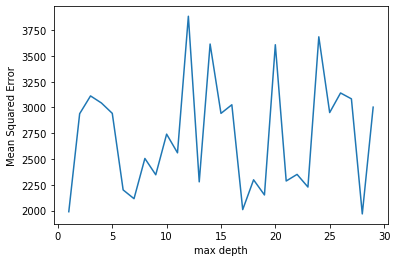

28


In [8]:
plt.plot(max_depth, mse)
plt.xlabel("max depth")
plt.ylabel("Mean Squared Error")
plt.show()
best_depth = max_depth[mse.index(min(mse))]
print(best_depth)

In [9]:
#split based on date
df['Date'] = pd.to_datetime(df['date'])
df = df.set_index('Date')
X = df.drop(columns=['Unnamed: 0','open_covid_region_code','country_region_code',
                    'country_region_code','country_region','sub_region_1','date','hospitalized_new'])
y = df['hospitalized_new']
X_train = X[:'2020-08-10']
X_validation = X['2020-08-17':]
y_train = y[:'2020-08-10'].values 
y_validation = y['2020-08-17':].values

In [10]:
#train the model
tree = DecisionTreeRegressor(max_depth=best_depth)
tree.fit(X_train,y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=28,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [11]:
pred=tree.predict(X_validation)
mse = ((pred - y_validation)**2).mean(axis=None)
print(mse)

1253.5
